In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns
import json
import requests
import folium

In [3]:
url = 'https://www.ncsl.org/research/labor-and-employment/state-unemployment-update.aspx'

In [13]:
df = pd.read_html(url)[0]
type(df)
df.head()

,State,Jan.,Feb.,March,April,May,June,July,Aug.,Sept.,Oct.,Nov.,Dec.
0,Alabama,4.3,4.0,3.8,3.6,3.4,3.3,3.2,3.1,3.1,3.1,3.1,3.1
1,Alaska,6.6,6.6,6.6,6.7,6.6,6.6,6.6,6.4,6.3,6.1,6.0,5.7
2,Arizona,6.7,6.9,6.7,6.7,6.7,6.8,6.6,6.2,5.7,5.2,4.7,4.1
3,Arkansas,4.6,4.5,4.4,4.4,4.4,4.4,4.3,4.2,4.0,3.7,3.4,3.1
4,California,9.0,8.5,8.3,8.3,7.9,7.7,7.6,7.5,7.5,7.3,6.9,6.5


In [61]:
sorted = list(pd.DataFrame(df.mean().sort_values(ascending=False)).index)

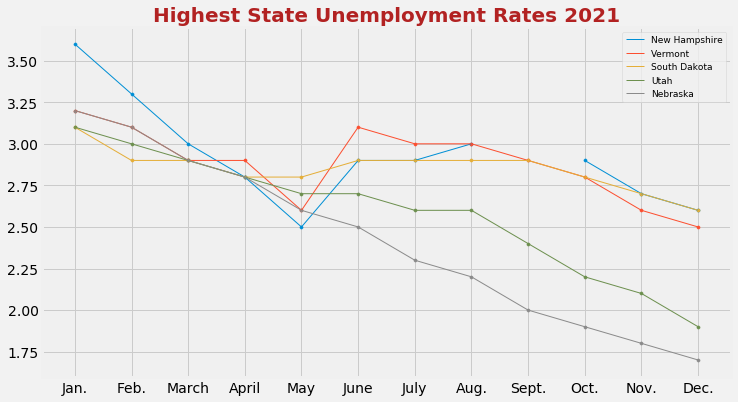

In [69]:
plt.figure(figsize=(11, 6), facecolor='0.95', )
plt.title('Highest State Unemployment Rates 2021', fontsize=20, color='firebrick', weight='semibold')
x = list(df.index)
states = sorted[-5:]
for s in states: #state
    pass
    y = df[s]
    plt.scatter( x, y, s=10 )
    plt.plot( x, y, linewidth=1 )
plt.legend( states, fontsize=9 )
plt.show()    

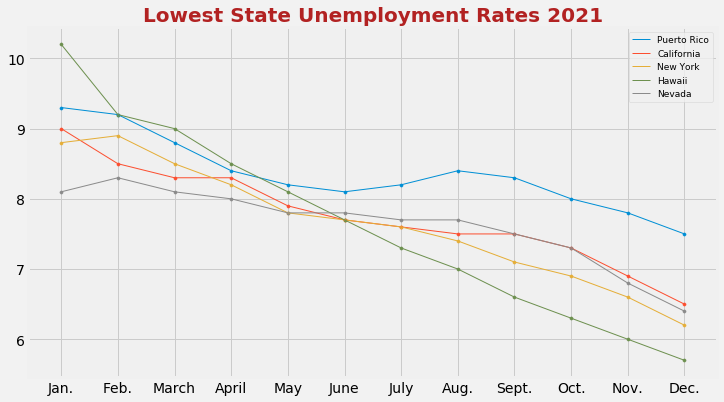

In [71]:
plt.figure(figsize=(11, 6), facecolor='0.95', )
plt.title('Lowest State Unemployment Rates 2021', fontsize=20, color='firebrick', weight='semibold')
x = list(df.index)
states = sorted[:5]
for s in states: #state
    pass
    y = df[s]
    plt.scatter( x, y, s=10 )
    plt.plot( x, y, linewidth=1 )
plt.legend( states, fontsize=9 )
plt.show()    

In [75]:
urljson = 'https://raw.githubusercontent.com/shawnbot/topogram/master/data/us-states.geojson'

In [82]:
df

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
Jan.,4.3,6.6,6.7,4.6,9.0,6.6,8.1,6.1,8.4,4.8,...,5.1,6.8,3.1,3.2,5.3,6.0,6.5,3.8,5.1,9.3
Feb.,4.0,6.6,6.9,4.5,8.5,6.6,8.5,6.3,8.1,4.7,...,4.9,6.9,3.0,3.1,5.2,5.6,6.2,3.8,5.3,9.2
March,3.8,6.6,6.7,4.4,8.3,6.4,8.3,6.5,7.8,4.7,...,5.0,6.9,2.9,2.9,5.1,5.4,5.9,3.8,5.3,8.8
April,3.6,6.7,6.7,4.4,8.3,6.4,8.1,6.4,7.5,4.8,...,5.0,6.7,2.8,2.9,4.7,5.4,5.8,3.9,5.4,8.4
May,3.4,6.6,6.7,4.4,7.9,6.2,7.7,5.9,7.2,4.9,...,5.0,6.5,2.7,2.6,4.5,5.2,5.5,3.9,5.4,8.2
June,3.3,6.6,6.8,4.4,7.7,6.2,7.9,5.8,7.0,5.0,...,4.9,6.5,2.7,3.1,4.3,5.2,5.3,3.9,5.4,8.1
July,3.2,6.6,6.6,4.3,7.6,6.1,7.3,5.6,6.7,5.1,...,4.7,6.2,2.6,3.0,4.2,5.1,5.0,3.9,5.2,8.2
Aug.,3.1,6.4,6.2,4.2,7.5,5.9,7.2,5.4,6.5,5.0,...,4.6,5.9,2.6,3.0,4.0,5.1,4.8,3.9,4.9,8.4
Sept.,3.1,6.3,5.7,4.0,7.5,5.6,6.8,5.3,6.5,4.9,...,4.4,5.6,2.4,2.9,3.8,4.9,4.6,3.9,4.5,8.3
Oct.,3.1,6.1,5.2,3.7,7.3,5.4,6.4,5.3,6.3,4.6,...,4.2,5.4,2.2,2.8,3.6,5.0,4.3,3.2,4.1,8.0


In [76]:
geo = json.loads(requests.get(urljson).text)

In [88]:
df.reset_index(inplace=True)

In [93]:
# df

In [94]:
m = folium.Map(location=[40, -102], zoom_start=3)

m.choropleth(
    geo_data = geo,                  #json
    data = pd.DataFrame( df ),                     
    columns = ['State', 'March'], #columns to work on
    key_on ='feature.name',
    fill_color ='YlGnBu',     #I passed colors Yellow,Green,Blue
    fill_opacity = 0.7,
    line_opacity = 0.1,
   legend_name = "Scale Test"
)
m